In [61]:
# Load packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, linear_model, tree
from sklearn import metrics
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np

In [24]:
# Load data
dat = pd.read_csv('./liver_cirrhosis.csv')

# Explore data
print(dat.describe())

             N_Days           Age     Bilirubin   Cholesterol       Albumin  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean    1887.117040  18495.877080      3.402644    372.331471      3.486578   
std     1091.690918   3737.596616      4.707491    193.668452      0.380488   
min       41.000000   9598.000000      0.300000    120.000000      1.960000   
25%     1080.000000  15694.000000      0.800000    275.000000      3.290000   
50%     1680.000000  18499.000000      1.300000    369.510563      3.510000   
75%     2576.000000  20955.000000      3.400000    369.510563      3.750000   
max     4795.000000  28650.000000     28.000000   1775.000000      4.640000   

             Copper      Alk_Phos          SGOT  Tryglicerides     Platelets  \
count  25000.000000  25000.000000  25000.000000   25000.000000  25000.000000   
mean     100.184663   1995.675597    123.166345     123.822548    256.007337   
std       73.184840   1798.885660     47.747616 

['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


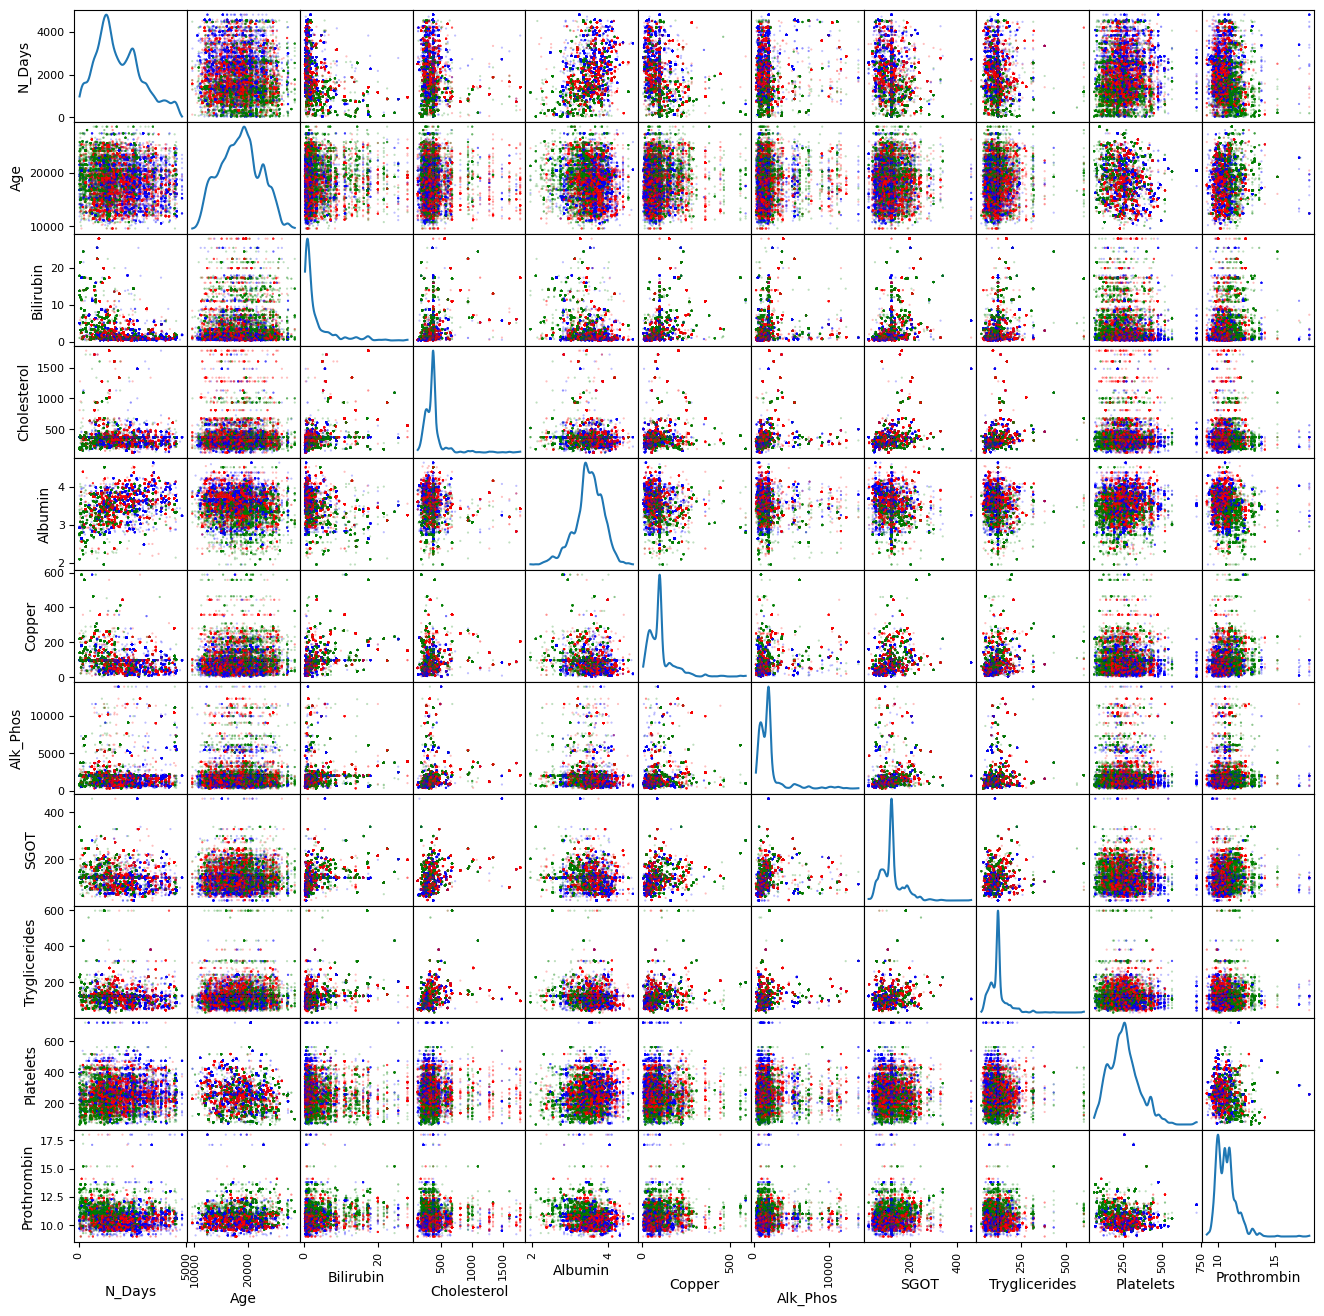

In [26]:
# Plot scatter matrix of numeric columns 

# Get names of numeric columns
numColNames = list(dat.select_dtypes(include='number').columns.values)
print(numColNames)

# Select numeric data columns
datNum = dat.select_dtypes(include='number')
datNum.drop(columns = 'Stage', inplace=True)

# Plot all columnsa against each other
pd.plotting.scatter_matrix(datNum, 
                           color = col, 
                           figsize=(16,16), 
                           range_padding=0.1, 
                           alpha=0.25,
                           diagonal='kde',
                           s=10);

<Axes: xlabel='Stage'>

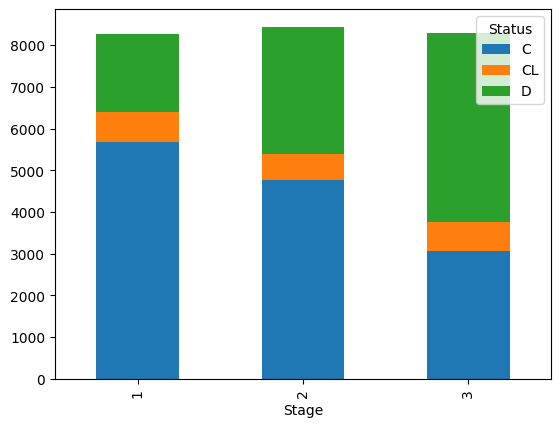

In [47]:
# Create bar plots of categorical data columns
catColNames = list(dat.select_dtypes(include='object').columns.values)
#print(catColNames)

# Make bar chart stacked - colour by Stage
# Convert stage to string to do this
dat['Stage'] = dat['Stage'].astype(str)
# Plot
dat2 = dat.groupby(['Status', 'Stage'])['Drug'].count().unstack('Status').fillna(0)
dat2.plot(kind='bar', stacked=True)


<Axes: xlabel='Drug'>

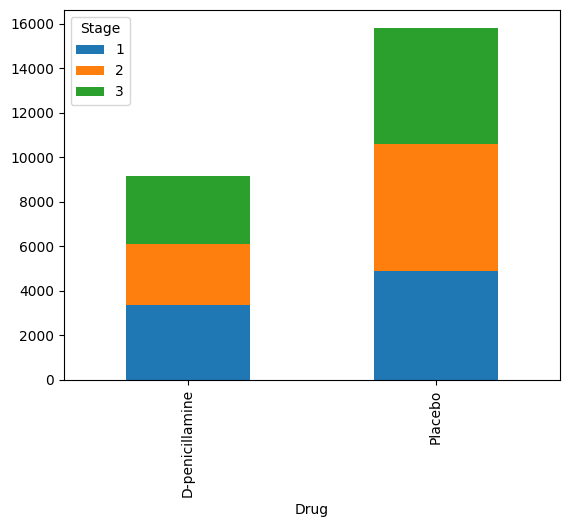

In [51]:
dat2 = dat.groupby(['Drug', 'Stage'])['Drug'].count().unstack('Stage').fillna(0)
dat2.plot(kind='bar', stacked=True)


<Axes: xlabel='Sex'>

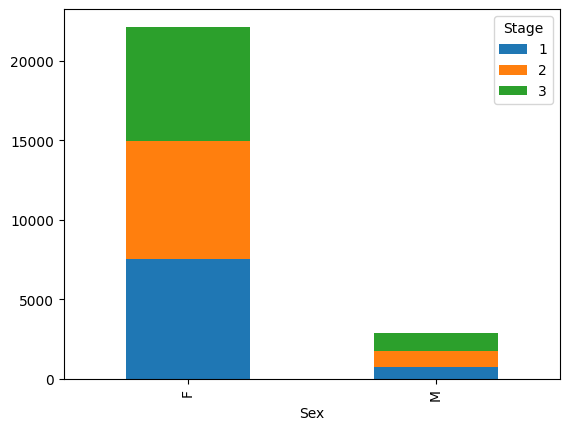

In [52]:
dat2 = dat.groupby(['Sex', 'Stage'])['Sex'].count().unstack('Stage').fillna(0)
dat2.plot(kind='bar', stacked=True)

<Axes: xlabel='Ascites'>

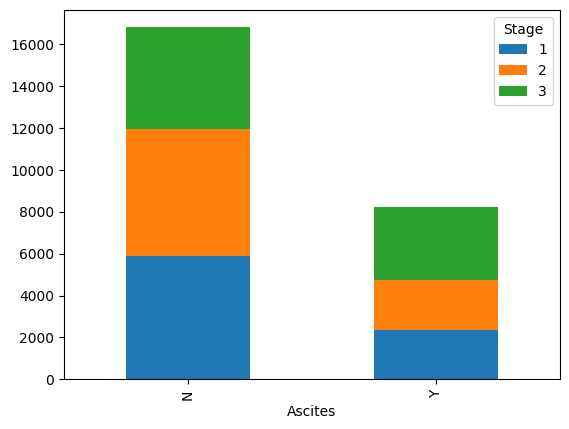

In [53]:
dat2 = dat.groupby(['Ascites', 'Stage'])['Ascites'].count().unstack('Stage').fillna(0)
dat2.plot(kind='bar', stacked=True)

<Axes: xlabel='Hepatomegaly'>

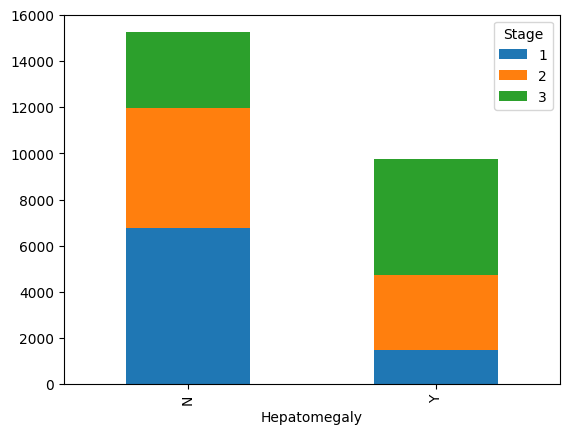

In [54]:
dat2 = dat.groupby(['Hepatomegaly', 'Stage'])['Hepatomegaly'].count().unstack('Stage').fillna(0)
dat2.plot(kind='bar', stacked=True)

<Axes: xlabel='Spiders'>

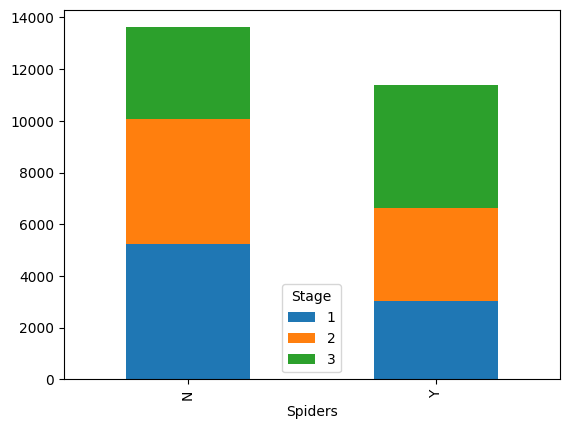

In [55]:
dat2 = dat.groupby(['Spiders', 'Stage'])['Spiders'].count().unstack('Stage').fillna(0)
dat2.plot(kind='bar', stacked=True)

<Axes: xlabel='Edema'>

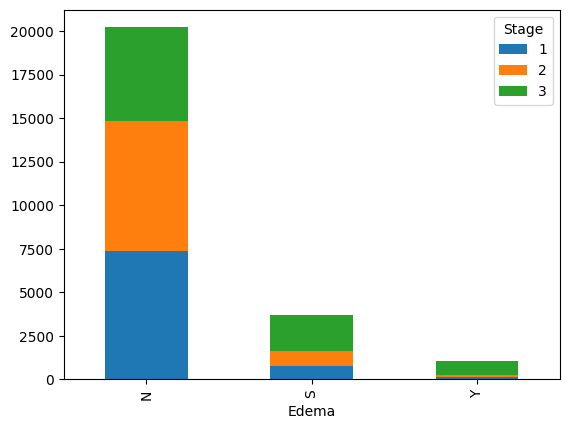

In [56]:
dat2 = dat.groupby(['Edema', 'Stage'])['Edema'].count().unstack('Stage').fillna(0)
dat2.plot(kind='bar', stacked=True)

<Axes: >

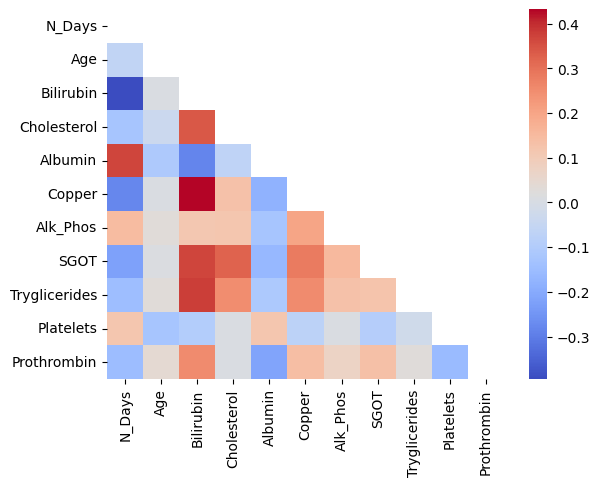

In [66]:
# Plot correlation heatmap of numeric columns
# Use Seaborn to plot heatmap of correlations
corrMat = datNum.corr()
mask = np.triu(np.ones_like(corrMat, dtype =np.bool_))
sns.heatmap(corrMat, cmap='coolwarm', mask=mask)


In [ ]:
# Train ML model to predict Stage (categorical columns need to be converted to numerical)